In [29]:
%pip install matplotlib json-repair scipy numpy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import json
from json_repair import repair_json
import matplotlib.pyplot as plt
from collections import Counter

In [31]:
sample_message = """{"message_id": 31329, "text": "expande tu imagen ! ! ! ! ! ! ! ! ! si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar", "label": 1, "label_text": "spam", "subject": "expande tu imagen ! ! ! ! ! ! ! ! !", "message": "si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar\n", "date": "2005-01-19"}"""
sample_messaage = repair_json(sample_message)
sample_message_json = json.loads(sample_messaage)
formatted_message_json = json.dumps(sample_message_json, indent=2)
print(formatted_message_json)

{
  "message_id": 31329,
  "text": "expande tu imagen ! ! ! ! ! ! ! ! ! si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repblica\nde chile actualizada el 14 de julio 2004 . su direccin ha sido extrada\nmanualmente por personal de nuestra compaa desde su sitio\nweb en internet , o ha sido introducida por usted al aceptar el envo\nde mensajes publicitarios al inscribirse en alguno de los sitios o foros\nde nuestra red de trabajo .\npara ser removido presione borrar",
  "label": 1,
  "label_text": "spam",
  "subject": "expande tu imagen ! ! ! ! ! ! ! ! !",
  "message": "si no puede ver este mail , entre a : http : / / www . supermedios . com / admin / mailing / proyecto . php ? id = 160\neste mensaje se enva bajo los artculos 2 y 4 de la ley\n19 . 628 y 28 b de la ley 19 . 955 de la constitucin de la repb

In [32]:
# Count elements in test.jsonl
test_list = []
with open('test.jsonl', 'r') as f:
    for line in f:
        test_item = json.loads(repair_json(line))
        test_list.append(test_item)


# Count elements in train.jsonl
train_list = []
with open('train.jsonl', 'r') as f:
    for line in f:
        train_item = json.loads(repair_json(line))
        train_list.append(train_item)

print(f"Number of elements in test.jsonl: {len(test_list)}")
print(f"Number of elements in train.jsonl: {len(train_list)}")

Number of elements in test.jsonl: 2000
Number of elements in train.jsonl: 31716


In [33]:

# Count label_text values in test set
test_label_counts = Counter()
for item in test_list:
    label = item.get('label_text', 'unknown')
    test_label_counts[label] += 1

# Count label_text values in train set
train_label_counts = Counter()
for item in train_list:
    label = item.get('label_text', 'unknown')
    train_label_counts[label] += 1

# Display statistics
print("=" * 60)
print("TEST SET STATISTICS")
print("=" * 60)
print(f"Total messages: {len(test_list)}")
for label, count in sorted(test_label_counts.items()):
    percentage = (count / len(test_list)) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

print("\n" + "=" * 60)
print("TRAIN SET STATISTICS")
print("=" * 60)
print(f"Total messages: {len(train_list)}")
for label, count in sorted(train_label_counts.items()):
    percentage = (count / len(train_list)) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

print("\n" + "=" * 60)
print("COMBINED STATISTICS")
print("=" * 60)
combined_total = len(test_list) + len(train_list)
print(f"Total messages: {combined_total:,}")

# Combine counts
combined_counts = Counter()
for label in set(list(test_label_counts.keys()) + list(train_label_counts.keys())):
    combined_counts[label] = test_label_counts[label] + train_label_counts[label]

for label, count in sorted(combined_counts.items()):
    percentage = (count / combined_total) * 100
    print(f"  {label}: {count:,} ({percentage:.2f}%)")

# Verify totals match
print("\n" + "=" * 60)
print("VERIFICATION")
print("=" * 60)
test_sum = sum(test_label_counts.values())
train_sum = sum(train_label_counts.values())
combined_sum = sum(combined_counts.values())

print(f"Test labels sum: {test_sum:,} (matches count: {test_sum == len(test_list)})")
print(f"Train labels sum: {train_sum:,} (matches count: {train_sum == len(train_list)})")
print(f"Combined sum: {combined_sum:,} (matches total: {combined_sum == combined_total})")


TEST SET STATISTICS
Total messages: 2000
  ham: 992 (49.60%)
  spam: 1,008 (50.40%)

TRAIN SET STATISTICS
Total messages: 31716
  ham: 15,553 (49.04%)
  spam: 16,163 (50.96%)

COMBINED STATISTICS
Total messages: 33,716
  ham: 16,545 (49.07%)
  spam: 17,171 (50.93%)

VERIFICATION
Test labels sum: 2,000 (matches count: True)
Train labels sum: 31,716 (matches count: True)
Combined sum: 33,716 (matches total: True)


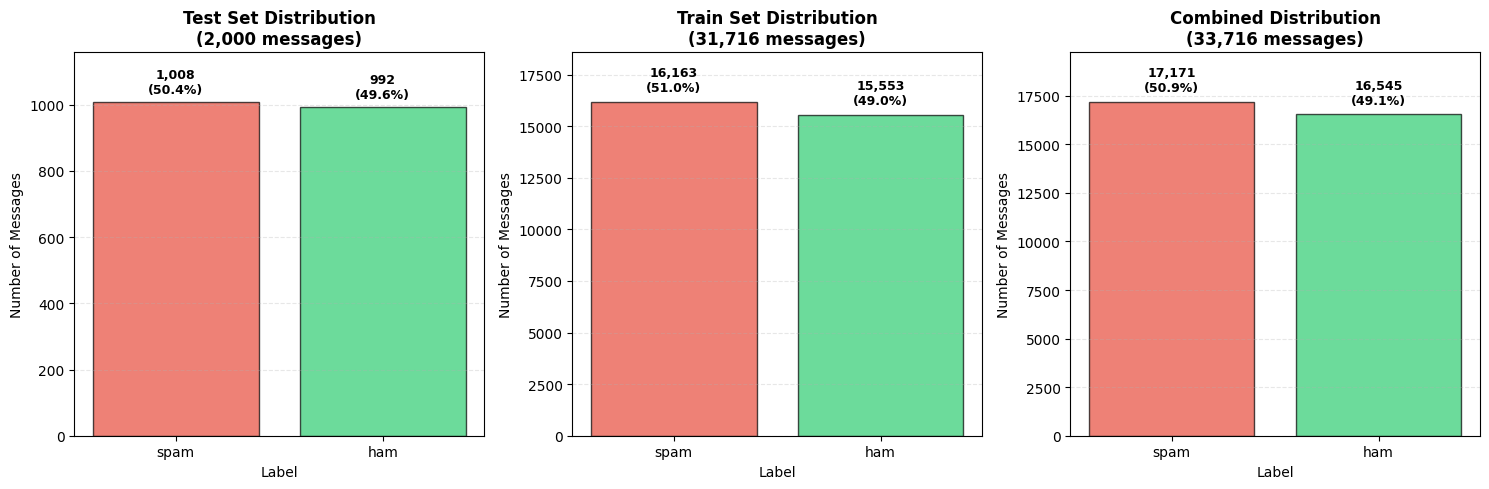

✓ Graphs saved as 'enron_dataset_distribution.png'


In [34]:

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Test Set Graph
test_labels = list(test_label_counts.keys())
test_values = list(test_label_counts.values())
test_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in test_labels]

axes[0].bar(test_labels, test_values, color=test_colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Test Set Distribution\n(2,000 messages)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Messages', fontsize=10)
axes[0].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(test_labels, test_values)):
    percentage = (value / len(test_list)) * 100
    axes[0].text(i, value + 20, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[0].set_ylim(0, max(test_values) * 1.15)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Train Set Graph
train_labels = list(train_label_counts.keys())
train_values = list(train_label_counts.values())
train_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in train_labels]

axes[1].bar(train_labels, train_values, color=train_colors, alpha=0.7, edgecolor='black')
axes[1].set_title('Train Set Distribution\n(31,716 messages)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Messages', fontsize=10)
axes[1].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(train_labels, train_values)):
    percentage = (value / len(train_list)) * 100
    axes[1].text(i, value + 400, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[1].set_ylim(0, max(train_values) * 1.15)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Combined Set Graph
combined_labels = list(combined_counts.keys())
combined_values = list(combined_counts.values())
combined_colors = ['#2ecc71' if label == 'ham' else '#e74c3c' for label in combined_labels]

axes[2].bar(combined_labels, combined_values, color=combined_colors, alpha=0.7, edgecolor='black')
axes[2].set_title('Combined Distribution\n(33,716 messages)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Number of Messages', fontsize=10)
axes[2].set_xlabel('Label', fontsize=10)
for i, (label, value) in enumerate(zip(combined_labels, combined_values)):
    percentage = (value / combined_total) * 100
    axes[2].text(i, value + 400, f'{value:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
axes[2].set_ylim(0, max(combined_values) * 1.15)
axes[2].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('enron_dataset_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Graphs saved as 'enron_dataset_distribution.png'")


In [35]:
def build_vocab(corpus):
    """
    Build a vocabulary from a corpus of email items.
    
    Args:
        corpus: List of dictionaries containing email data with 'text' attribute
    
    Returns:
        vocab: Dictionary mapping words to unique integer IDs
    """
    vocab = {}
    for email_item in corpus:
        # Get the text field from the email item
        email_text = email_item.get('text', '')
        
        # Split the text into words and build vocab
        for word in email_text.split():
            if word not in vocab:
                vocab[word] = len(vocab)
    
    return vocab

# Build vocabulary from training dataset
print("Building vocabulary from training dataset...")
vocab = build_vocab(train_list)

print(f"\nVocabulary Statistics:")
print(f"  Total unique words: {len(vocab):,}")
print(f"\nFirst 20 words in vocabulary:")
for i, (word, idx) in enumerate(list(vocab.items())[:20]):
    print(f"  '{word}': {idx}")
print("  ...")


Building vocabulary from training dataset...

Vocabulary Statistics:
  Total unique words: 154,295

First 20 words in vocabulary:
  'any': 0
  'software': 1
  'just': 2
  'for': 3
  '15': 4
  '$': 5
  '-': 6
  '99': 7
  'understanding': 8
  'oem': 9
  'lead': 10
  'me': 11
  'not': 12
  'into': 13
  'temptation': 14
  ';': 15
  'i': 16
  'can': 17
  'find': 18
  'the': 19
  ...


In [36]:
from scipy.sparse import lil_matrix, csr_matrix
import numpy as np
from pprint import pprint

def vectorize_sparse(email_item, vocab):
    """
    Convert an email item to a sparse binary vector representation.
    Uses sparse matrix to save memory - only stores non-zero values.
    
    Args:
        email_item: Dictionary containing email data with 'text' attribute
        vocab: Dictionary mapping words to unique integer IDs
    
    Returns:
        indices: List of indices where the value is 1
    """
    email_text = email_item.get('text', '')
    indices = []
    
    for word in email_text.split():
        if word in vocab:
            idx = vocab[word]
            if idx not in indices:  # Avoid duplicates
                indices.append(idx)
    
    return indices

def create_sparse_matrix(corpus, vocab):
    """
    Create a sparse matrix representation of the corpus.
    
    Args:
        corpus: List of email items
        vocab: Dictionary mapping words to unique integer IDs
    
    Returns:
        Sparse matrix in CSR format (rows=emails, cols=vocab size)
    """
    n_emails = len(corpus)
    n_features = len(vocab)
    
    print(f"Creating sparse matrix: {n_emails:,} emails × {n_features:,} features")
    
    # Use LIL (List of Lists) format for efficient construction
    sparse_matrix = lil_matrix((n_emails, n_features), dtype=np.int8)
    
    for i, email_item in enumerate(corpus):
        if i % 5000 == 0:
            print(f"  Processing email {i:,}/{n_emails:,}...")
        
        indices = vectorize_sparse(email_item, vocab)
        for idx in indices:
            sparse_matrix[i, idx] = 1
    
    # Convert to CSR format for efficient arithmetic and matrix operations
    sparse_matrix_csr = sparse_matrix.tocsr()
    
    return sparse_matrix_csr

# Create sparse matrices for training and test sets
print("=" * 60)
print("CREATING SPARSE MATRICES (Memory Efficient)")
print("=" * 60)

print("\nTraining set:")
train_sparse = create_sparse_matrix(train_list, vocab)

print("\nTest set:")
test_sparse = create_sparse_matrix(test_list, vocab)

print("\n" + "=" * 60)
print("SPARSE MATRIX STATISTICS")
print("=" * 60)
print(f"Vocabulary size: {len(vocab):,} unique words")
print(f"\nTraining set:")
print(f"  Shape: {train_sparse.shape} (emails × features)")
print(f"  Non-zero elements: {train_sparse.nnz:,}")
print(f"  Sparsity: {(1 - train_sparse.nnz / (train_sparse.shape[0] * train_sparse.shape[1])) * 100:.4f}%")
print(f"  Memory usage: ~{train_sparse.data.nbytes / (1024**2):.2f} MB")

print(f"\nTest set:")
print(f"  Shape: {test_sparse.shape} (emails × features)")
print(f"  Non-zero elements: {test_sparse.nnz:,}")
print(f"  Sparsity: {(1 - test_sparse.nnz / (test_sparse.shape[0] * test_sparse.shape[1])) * 100:.4f}%")
print(f"  Memory usage: ~{test_sparse.data.nbytes / (1024**2):.2f} MB")

# Calculate what dense matrix would require
dense_size_train = train_sparse.shape[0] * train_sparse.shape[1] / (1024**2)
dense_size_test = test_sparse.shape[0] * test_sparse.shape[1] / (1024**2)
print(f"\nMemory savings:")
print(f"  Dense matrix would require: ~{dense_size_train:.2f} MB (train), ~{dense_size_test:.2f} MB (test)")
print(f"  Sparse matrix uses: ~{train_sparse.data.nbytes / (1024**2):.2f} MB (train), ~{test_sparse.data.nbytes / (1024**2):.2f} MB (test)")
print(f"  Reduction: ~{(1 - (train_sparse.data.nbytes / (dense_size_train * 1024**2))) * 100:.1f}%")

# Show example: first email
print("\n" + "=" * 60)
print("EXAMPLE: First Training Email")
print("=" * 60)
first_email = train_list[0]
first_vector = train_sparse[0]

print(f"Label: {first_email.get('label_text', 'unknown')}")
print(f"Subject: {first_email.get('subject', 'N/A')[:60]}...")
print(f"\nText preview (first 200 chars):")
print(first_email.get('text', '')[:200] + "...")
print(f"\nVector stats:")
print(f"  Total dimensions: {train_sparse.shape[1]:,}")
print(f"  Non-zero values: {first_vector.nnz:,}")
print(f"  Sparsity: {(1 - first_vector.nnz / train_sparse.shape[1]) * 100:.2f}%")

# Show which words are present
words_in_email = [word for word in first_email.get('text', '').split() if word in vocab]
print(f"\nUnique words in email: {len(set(words_in_email)):,}")
print(f"First 20 unique words: {list(set(words_in_email))[:20]}")


CREATING SPARSE MATRICES (Memory Efficient)

Training set:
Creating sparse matrix: 31,716 emails × 154,295 features
  Processing email 0/31,716...
  Processing email 5,000/31,716...
  Processing email 10,000/31,716...
  Processing email 15,000/31,716...
  Processing email 20,000/31,716...
  Processing email 25,000/31,716...
  Processing email 30,000/31,716...

Test set:
Creating sparse matrix: 2,000 emails × 154,295 features
  Processing email 0/2,000...

SPARSE MATRIX STATISTICS
Vocabulary size: 154,295 unique words

Training set:
  Shape: (31716, 154295) (emails × features)
  Non-zero elements: 4,148,744
  Sparsity: 99.9152%
  Memory usage: ~3.96 MB

Test set:
  Shape: (2000, 154295) (emails × features)
  Non-zero elements: 253,405
  Sparsity: 99.9179%
  Memory usage: ~0.24 MB

Memory savings:
  Dense matrix would require: ~4666.92 MB (train), ~294.29 MB (test)
  Sparse matrix uses: ~3.96 MB (train), ~0.24 MB (test)
  Reduction: ~99.9%

EXAMPLE: First Training Email
Label: spam
Subje

In [37]:
import math

def train_naive_bayes(sparse_matrix, corpus, vocab):
    """
    Train a Naive Bayes classifier using sparse matrix representation.
    Memory-efficient implementation using sparse matrices.
    
    Args:
        sparse_matrix: CSR sparse matrix (n_emails × vocab_size)
        corpus: List of email items with 'label_text' attribute
        vocab: Dictionary mapping words to indices
    
    Returns:
        Dictionary containing trained model parameters
    """
    n = sparse_matrix.shape[0]
    vocab_size = sparse_matrix.shape[1]
    
    print(f"Training Naive Bayes classifier...")
    print(f"  Emails: {n:,}")
    print(f"  Vocabulary size: {vocab_size:,}")
    
    # Extract labels
    labels = [item.get('label_text', 'unknown') for item in corpus]
    
    # Count spam and ham emails
    spam_count = sum(1 for L in labels if L == "spam")
    ham_count = sum(1 for L in labels if L == "ham")
    
    print(f"  Spam emails: {spam_count:,}")
    print(f"  Ham emails: {ham_count:,}")
    
    # Prior probabilities
    p_spam = spam_count / n
    p_ham = ham_count / n
    
    print(f"\nPrior probabilities:")
    print(f"  P(spam) = {p_spam:.4f}")
    print(f"  P(ham) = {p_ham:.4f}")
    
    # Initialize word counts (use numpy for efficiency)
    spam_word_count = np.zeros(vocab_size, dtype=np.int32)
    ham_word_count = np.zeros(vocab_size, dtype=np.int32)
    
    # Count word occurrences in spam and ham emails
    print(f"\nCounting word occurrences...")
    for i, label in enumerate(labels):
        if i % 5000 == 0:
            print(f"  Processing email {i:,}/{n:,}...")
        
        # Get the sparse row for this email
        row = sparse_matrix[i]
        
        # Get indices of non-zero elements (words present in email)
        _, word_indices = row.nonzero()
        
        if label == "spam":
            spam_word_count[word_indices] += 1
        elif label == "ham":
            ham_word_count[word_indices] += 1
    
    print(f"\nApplying Laplace smoothing...")
    
    # Laplace smoothing for binary Naive Bayes
    # P(word | spam) = (count of spam emails with word + 1) / (total spam emails + 2)
    p_word_given_spam = (spam_word_count + 1) / (spam_count + 2)
    p_word_given_ham = (ham_word_count + 1) / (ham_count + 2)
    
    # Calculate log probabilities to avoid underflow
    log_p_word_given_spam = np.log(p_word_given_spam)
    log_p_word_given_ham = np.log(p_word_given_ham)
    
    # Pre-compute log(1-p) for faster prediction
    log_1_minus_p_spam = np.log(1 - p_word_given_spam)
    log_1_minus_p_ham = np.log(1 - p_word_given_ham)
    
    # Pre-compute sum of log(1-p) for all words (constant for all emails)
    sum_log_1_minus_p_spam = np.sum(log_1_minus_p_spam)
    sum_log_1_minus_p_ham = np.sum(log_1_minus_p_ham)
    
    print(f"\nModel trained successfully!")
    
    # Show some statistics
    print(f"\nWord occurrence statistics:")
    print(f"  Words appearing in spam: {np.count_nonzero(spam_word_count):,}")
    print(f"  Words appearing in ham: {np.count_nonzero(ham_word_count):,}")
    print(f"  Words in both: {np.count_nonzero((spam_word_count > 0) & (ham_word_count > 0)):,}")
    
    return {
        "p_spam": p_spam,
        "p_ham": p_ham,
        "p_w_spam": p_word_given_spam,
        "p_w_ham": p_word_given_ham,
        "log_p_w_spam": log_p_word_given_spam,
        "log_p_w_ham": log_p_word_given_ham,
        "log_1_minus_p_spam": log_1_minus_p_spam,
        "log_1_minus_p_ham": log_1_minus_p_ham,
        "sum_log_1_minus_p_spam": sum_log_1_minus_p_spam,
        "sum_log_1_minus_p_ham": sum_log_1_minus_p_ham,
        "vocab": vocab,
        "spam_count": spam_count,
        "ham_count": ham_count
    }

# Train the model on the training dataset
print("=" * 60)
print("TRAINING NAIVE BAYES CLASSIFIER")
print("=" * 60)

model = train_naive_bayes(train_sparse, train_list, vocab)

print("\n" + "=" * 60)
print("MODEL SUMMARY")
print("=" * 60)
print(f"Vocabulary size: {len(model['vocab']):,}")
print(f"Training set size: {len(train_list):,}")
print(f"  Spam: {model['spam_count']:,} ({model['p_spam']*100:.2f}%)")
print(f"  Ham: {model['ham_count']:,} ({model['p_ham']*100:.2f}%)")

# Show most indicative words for spam
print(f"\n" + "=" * 60)
print("TOP 20 SPAM INDICATORS")
print("=" * 60)

# Calculate spam indicator score: P(word|spam) / P(word|ham)
spam_indicators = model['p_w_spam'] / model['p_w_ham']
top_spam_indices = np.argsort(spam_indicators)[-20:][::-1]

# Create reverse vocab mapping
idx_to_word = {idx: word for word, idx in vocab.items()}

for rank, idx in enumerate(top_spam_indices, 1):
    word = idx_to_word.get(idx, f"<index_{idx}>")
    ratio = spam_indicators[idx]
    p_spam = model['p_w_spam'][idx]
    p_ham = model['p_w_ham'][idx]
    print(f"{rank:2d}. '{word[:30]}' - Ratio: {ratio:.2f} (P(w|spam)={p_spam:.4f}, P(w|ham)={p_ham:.4f})")

# Show most indicative words for ham
print(f"\n" + "=" * 60)
print("TOP 20 HAM INDICATORS")
print("=" * 60)

ham_indicators = model['p_w_ham'] / model['p_w_spam']
top_ham_indices = np.argsort(ham_indicators)[-20:][::-1]

for rank, idx in enumerate(top_ham_indices, 1):
    word = idx_to_word.get(idx, f"<index_{idx}>")
    ratio = ham_indicators[idx]
    p_spam = model['p_w_spam'][idx]
    p_ham = model['p_w_ham'][idx]
    print(f"{rank:2d}. '{word[:30]}' - Ratio: {ratio:.2f} (P(w|ham)={p_ham:.4f}, P(w|spam)={p_spam:.4f})")


TRAINING NAIVE BAYES CLASSIFIER
Training Naive Bayes classifier...
  Emails: 31,716
  Vocabulary size: 154,295
  Spam emails: 16,163
  Ham emails: 15,553

Prior probabilities:
  P(spam) = 0.5096
  P(ham) = 0.4904

Counting word occurrences...
  Processing email 0/31,716...
  Processing email 5,000/31,716...
  Processing email 10,000/31,716...
  Processing email 15,000/31,716...
  Processing email 20,000/31,716...
  Processing email 25,000/31,716...
  Processing email 30,000/31,716...

Applying Laplace smoothing...

Model trained successfully!

Word occurrence statistics:
  Words appearing in spam: 122,288
  Words appearing in ham: 58,759
  Words in both: 26,752

MODEL SUMMARY
Vocabulary size: 154,295
Training set size: 31,716
  Spam: 16,163 (50.96%)
  Ham: 15,553 (49.04%)

TOP 20 SPAM INDICATORS
 1. 'viagra' - Ratio: 944.94 (P(w|spam)=0.0607, P(w|ham)=0.0001)
 2. 'cialis' - Ratio: 568.70 (P(w|spam)=0.0366, P(w|ham)=0.0001)
 3. 'pills' - Ratio: 487.87 (P(w|spam)=0.0314, P(w|ham)=0.0001)

In [38]:
def predict_proba_sparse(sparse_vector, model):
    """
    Predict probability that an email is spam using Naive Bayes.
    Highly optimized version using pre-computed values and vectorized operations.
    
    Args:
        sparse_vector: Sparse row from matrix (CSR format)
        model: Trained Naive Bayes model
    
    Returns:
        (spam_probability, ham_probability)
    """
    # Start with log of prior probabilities + sum of log(1-p) for all words
    log_spam = math.log(model["p_spam"]) + model["sum_log_1_minus_p_spam"]
    log_ham = math.log(model["p_ham"]) + model["sum_log_1_minus_p_ham"]
    
    # Get indices of words present in the email (non-zero elements)
    _, word_indices = sparse_vector.nonzero()
    
    # For present words: subtract log(1-p) and add log(p)
    # This is equivalent to: replacing log(1-p) with log(p) for present words
    if len(word_indices) > 0:
        # Subtract the log(1-p) contribution (since we added it for all words)
        log_spam -= np.sum(model["log_1_minus_p_spam"][word_indices])
        log_ham -= np.sum(model["log_1_minus_p_ham"][word_indices])
        
        # Add the log(p) contribution for present words
        log_spam += np.sum(model["log_p_w_spam"][word_indices])
        log_ham += np.sum(model["log_p_w_ham"][word_indices])
    
    # Convert from log-space back to probabilities using log-sum-exp trick
    max_log = max(log_spam, log_ham)
    spam_score = math.exp(log_spam - max_log)
    ham_score = math.exp(log_ham - max_log)
    
    total = spam_score + ham_score
    return spam_score / total, ham_score / total

def evaluate_model(sparse_matrix, corpus, model, dataset_name="Dataset"):
    """
    Evaluate the Naive Bayes model on a dataset.
    
    Args:
        sparse_matrix: Sparse matrix of emails
        corpus: List of email items with labels
        model: Trained model
        dataset_name: Name for printing results
    
    Returns:
        Dictionary with evaluation metrics
    """
    n_emails = len(corpus)
    predictions = []
    true_labels = []
    
    print(f"Evaluating on {dataset_name} ({n_emails:,} emails)...")
    
    for i in range(n_emails):
        if i % 500 == 0:
            print(f"  Processing email {i:,}/{n_emails:,}...")
        
        # Get sparse vector for this email
        sparse_vec = sparse_matrix[i]
        
        # Predict
        spam_prob, ham_prob = predict_proba_sparse(sparse_vec, model)
        
        # Classify as spam if spam_prob > 0.5
        predicted_label = "spam" if spam_prob > 0.5 else "ham"
        true_label = corpus[i].get('label_text', 'unknown')
        
        predictions.append({
            'predicted': predicted_label,
            'spam_prob': spam_prob,
            'ham_prob': ham_prob
        })
        true_labels.append(true_label)
    
    # Calculate metrics
    true_positives = sum(1 for i in range(n_emails) 
                        if true_labels[i] == "spam" and predictions[i]['predicted'] == "spam")
    false_positives = sum(1 for i in range(n_emails) 
                         if true_labels[i] == "ham" and predictions[i]['predicted'] == "spam")
    true_negatives = sum(1 for i in range(n_emails) 
                        if true_labels[i] == "ham" and predictions[i]['predicted'] == "ham")
    false_negatives = sum(1 for i in range(n_emails) 
                         if true_labels[i] == "spam" and predictions[i]['predicted'] == "ham")
    
    accuracy = (true_positives + true_negatives) / n_emails
    
    # Precision: Of all emails we predicted as spam, how many were actually spam?
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    
    # Recall: Of all actual spam emails, how many did we catch?
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    # F1 Score: Harmonic mean of precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'predictions': predictions,
        'true_labels': true_labels,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'true_negatives': true_negatives,
        'false_negatives': false_negatives
    }

# Evaluate on test set
print("=" * 60)
print("EVALUATING MODEL ON TEST SET")
print("=" * 60)

test_results = evaluate_model(test_sparse, test_list, model, "Test Set")

# Print results
print("\n" + "=" * 60)
print("TEST SET RESULTS")
print("=" * 60)
print(f"Total emails: {len(test_list):,}")
print(f"\nConfusion Matrix:")
print(f"  True Positives (Spam correctly identified):  {test_results['true_positives']:,}")
print(f"  False Positives (Ham wrongly marked as spam): {test_results['false_positives']:,}")
print(f"  True Negatives (Ham correctly identified):   {test_results['true_negatives']:,}")
print(f"  False Negatives (Spam missed):               {test_results['false_negatives']:,}")

print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {test_results['accuracy']*100:.2f}%")
print(f"  Precision: {test_results['precision']*100:.2f}% (of predicted spam, how many were actually spam)")
print(f"  Recall:    {test_results['recall']*100:.2f}% (of actual spam, how many did we catch)")
print(f"  F1 Score:  {test_results['f1_score']:.4f} (harmonic mean of precision & recall)")

# Show some example predictions
print("\n" + "=" * 60)
print("EXAMPLE PREDICTIONS (First 10 emails)")
print("=" * 60)

for i in range(min(10, len(test_list))):
    email = test_list[i]
    pred = test_results['predictions'][i]
    true_label = test_results['true_labels'][i]
    
    correct = "✓" if pred['predicted'] == true_label else "✗"
    
    print(f"\nEmail {i+1}: {correct}")
    print(f"  Subject: {email.get('subject', 'N/A')[:50]}...")
    print(f"  True label: {true_label}")
    print(f"  Predicted: {pred['predicted']}")
    print(f"  Probabilities: Spam={pred['spam_prob']:.4f}, Ham={pred['ham_prob']:.4f}")


EVALUATING MODEL ON TEST SET
Evaluating on Test Set (2,000 emails)...
  Processing email 0/2,000...
  Processing email 500/2,000...
  Processing email 1,000/2,000...
  Processing email 1,500/2,000...

TEST SET RESULTS
Total emails: 2,000

Confusion Matrix:
  True Positives (Spam correctly identified):  999
  False Positives (Ham wrongly marked as spam): 30
  True Negatives (Ham correctly identified):   962
  False Negatives (Spam missed):               9

Performance Metrics:
  Accuracy:  98.05%
  Precision: 97.08% (of predicted spam, how many were actually spam)
  Recall:    99.11% (of actual spam, how many did we catch)
  F1 Score:  0.9809 (harmonic mean of precision & recall)

EXAMPLE PREDICTIONS (First 10 emails)

Email 1: ✓
  Subject: expande tu imagen ! ! ! ! ! ! ! ! !...
  True label: spam
  Predicted: spam
  Probabilities: Spam=1.0000, Ham=0.0000

Email 2: ✓
  Subject: paliourg learning for life...
  True label: spam
  Predicted: spam
  Probabilities: Spam=1.0000, Ham=0.0000

E

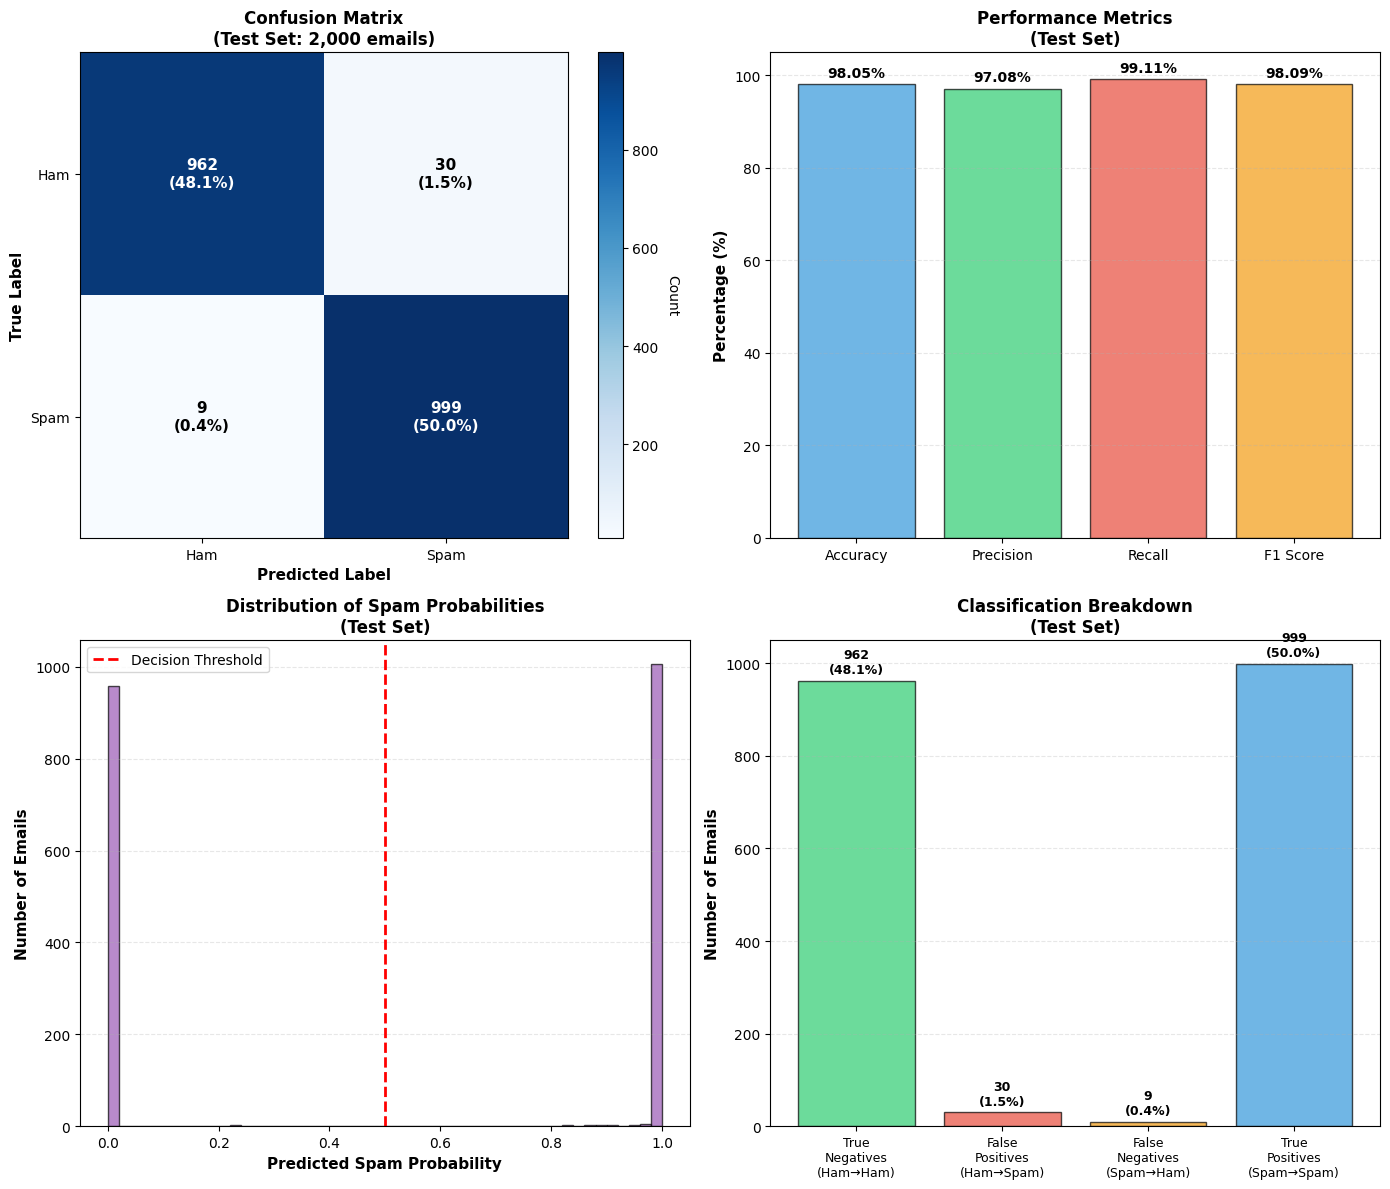

✓ Performance graphs saved as 'model_performance_metrics.png'

PERFORMANCE SUMMARY
Overall Accuracy: 98.05%
  → Correctly classified: 1,961/2,000 emails

Spam Detection:
  Precision: 97.08% (reliability of spam predictions)
  Recall:    99.11% (spam catching rate)
  F1 Score:  0.9809

Error Analysis:
  False Positives: 30 (ham marked as spam)
  False Negatives: 9 (spam that got through)
  False Positive Rate: 3.02%
  False Negative Rate: 0.89%


In [39]:
# Create visualizations of model performance
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Confusion Matrix Heatmap
confusion_data = np.array([
    [test_results['true_negatives'], test_results['false_positives']],
    [test_results['false_negatives'], test_results['true_positives']]
])

im = axes[0, 0].imshow(confusion_data, cmap='Blues', aspect='auto')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_yticks([0, 1])
axes[0, 0].set_xticklabels(['Ham', 'Spam'])
axes[0, 0].set_yticklabels(['Ham', 'Spam'])
axes[0, 0].set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('True Label', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Confusion Matrix\n(Test Set: 2,000 emails)', fontsize=12, fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(2):
        value = confusion_data[i, j]
        percentage = (value / len(test_list)) * 100
        text_color = 'white' if value > confusion_data.max() / 2 else 'black'
        axes[0, 0].text(j, i, f'{value:,}\n({percentage:.1f}%)', 
                       ha='center', va='center', color=text_color, 
                       fontsize=11, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[0, 0])
cbar.set_label('Count', rotation=270, labelpad=15)

# 2. Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [
    test_results['accuracy'] * 100,
    test_results['precision'] * 100,
    test_results['recall'] * 100,
    test_results['f1_score'] * 100
]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

bars = axes[0, 1].bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Performance Metrics\n(Test Set)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim(0, 105)
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.2f}%', ha='center', va='bottom', 
                   fontsize=10, fontweight='bold')

# 3. Prediction Distribution (Spam Probabilities)
spam_probs = [pred['spam_prob'] for pred in test_results['predictions']]
axes[1, 0].hist(spam_probs, bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1, 0].set_xlabel('Predicted Spam Probability', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Number of Emails', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Spam Probabilities\n(Test Set)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')

# 4. True vs Predicted Labels Breakdown
categories = ['True\nNegatives\n(Ham→Ham)', 'False\nPositives\n(Ham→Spam)', 
              'False\nNegatives\n(Spam→Ham)', 'True\nPositives\n(Spam→Spam)']
counts = [
    test_results['true_negatives'],
    test_results['false_positives'],
    test_results['false_negatives'],
    test_results['true_positives']
]
bar_colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']

bars = axes[1, 1].bar(range(len(categories)), counts, color=bar_colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_xticks(range(len(categories)))
axes[1, 1].set_xticklabels(categories, fontsize=9)
axes[1, 1].set_ylabel('Number of Emails', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Classification Breakdown\n(Test Set)', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percentage = (count / len(test_list)) * 100
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{count:,}\n({percentage:.1f}%)', 
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('model_performance_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Performance graphs saved as 'model_performance_metrics.png'")

# Print summary statistics
print("\n" + "=" * 60)
print("PERFORMANCE SUMMARY")
print("=" * 60)
print(f"Overall Accuracy: {test_results['accuracy']*100:.2f}%")
print(f"  → Correctly classified: {test_results['true_positives'] + test_results['true_negatives']:,}/{len(test_list):,} emails")
print(f"\nSpam Detection:")
print(f"  Precision: {test_results['precision']*100:.2f}% (reliability of spam predictions)")
print(f"  Recall:    {test_results['recall']*100:.2f}% (spam catching rate)")
print(f"  F1 Score:  {test_results['f1_score']:.4f}")
print(f"\nError Analysis:")
print(f"  False Positives: {test_results['false_positives']:,} (ham marked as spam)")
print(f"  False Negatives: {test_results['false_negatives']:,} (spam that got through)")
print(f"  False Positive Rate: {(test_results['false_positives']/(test_results['true_negatives']+test_results['false_positives']))*100:.2f}%")
print(f"  False Negative Rate: {(test_results['false_negatives']/(test_results['true_positives']+test_results['false_negatives']))*100:.2f}%")
